# Дано:

$x$, м — координата точки
$t$, с — время (от 0 до 14400 с).
$S(x,t)$ — доля объёма пор, занятых водой
$i = 1$ — исходно насыщающая пласт жидкость
$i = 2$ — закачиваемая жидкость
$m = 0.3$ — коэффициент пористости
$k_i$ и $\mu_i = const$ — коэффициенты относительной фазовой проницаемости и динамической вязкости соответственно.

Принять, что соотношение коэффициентов $k_1/k_2$ равно соотношению насыщенности жидкостей

$$
\frac{k_1}{k_2} = \frac{S_1}{S_2}
$$

Динамическая вязкость для исходно насыщающей пласт жидкости в два раза больше, чем для закачиваемой жидкости:

$$
\frac{\mu_1}{\mu_2} = 2
$$

Линейный закон фильтрации:

$$
u_i = - \frac{k_i}{\mu_i} \nabla p
$$

Суммарная скорость фильтрации двух жидкостей $u_1 + u_2$ постоянна и равна $0.1 \frac{\text{мм}}{\text{с}}$:

$$
u_1 + u_2 = 0.0001 = u
$$

Принять, что при совместном течении в пористом пласте нескольких несмешивающихся жидкостей величина насыщенности $S_i$ для каждой жидкости связана со скоростью фильтрации $u_i$ следующим соотношением:

$$
m \frac{\partial S_i}{\partial t} = - \text{div}\; u_i
$$

# Решение


(1)
$$
u_1 = - \frac{k_1}{\mu_1} \frac{\partial p}{\partial x}
$$

(2)
$$
u_2 = - \frac{k_2}{\mu_2} \frac{\partial p}{\partial x}
$$

(3)
$$
m \frac{\partial S_1}{\partial t} = - \frac{\partial u_1}{\partial x}
$$

(4)
$$
m \frac{\partial S_2}{\partial t} = - \frac{\partial u_2}{\partial x}
$$

(1)/(2)

(5)

$$
\frac{u_1}{u_2} = \frac{k_1}{k_2} \frac{\mu_2}{\mu_1} = \frac{S_1}{2 S_2}
$$

(6)
$$
u_1 + u_2 = 0.0001 = u
$$

Система нелинейных алгебраических уравнений $(5) - (6)$ может быть решена аналитически или численно методом Ньютона на каждом шаге по времени.

Так как в системе только две жидкости, их суммарная насыщенность всегда равна $1$, то есть

(7)
$$
S_1 + S_2 = 1
$$.

Поэтому уравнение $(3)$ можно не решать ввиду его избыточности.

Решаем уравнение $(4)$:

$$
m \frac{\partial S_2}{\partial t} = - \frac{\partial u_2}{\partial x}
$$

Из $(5)$, $(6)$ $(7)$
$$
S_1 + S_2 = 1 \leftrightarrow S_1 = 1 - S_2
$$

$$
\frac{u_1}{u_2} = \frac{S_1}{2 S_2} \leftrightarrow u_1 \cdot 2 \cdot S_2 = S_1 \cdot u_2
$$

$$
u_1 + u_2 = u \leftrightarrow u_1 = u - u_2
$$

Оставляем выражение для $u_2$:

$$
(u - u_2) \cdot 2 \cdot S_2 = (1 - S_2) \cdot u_2 \leftrightarrow u_2 = \frac{2 u S_2}{1 + S_2}
$$

Получаем уравнение относительно $S = S_2$ следующего вида:
$$
\begin{cases}
m \frac{\partial S}{\partial t} + \frac{2 u \frac{\partial S}{\partial x}}{1 + S} - \frac{2 u S \frac{\partial S}{\partial t}}{(1 + S)^2} = 0 \\
S_2 (x = 10) = 1 \\
S_2 (t = 0) = \begin{cases}
0, x < 10 \\
1, x = 10
\end{cases}
\end{cases}
$$

In [13]:
from scipy import optimize
import numpy as np

max_time = float(3600*4)
max_x = float(10)

nx, nt = 100, 100
hx, ht = max_x / float(nx - 1), max_time / float(nt - 1)

m = 0.3
u = -0.0001

print(abs(u) * ht / hx)

0.14400000000000002


In [14]:
P_right = 1
P_bottom = 0

In [15]:
def residual(S):
   d1x = np.zeros_like(S)
   d1t = np.zeros_like(S)

   d1x[0:-1] = (S[1:] - S[0:-1]) / hx
   d1x[-1] = (P_right - S[-1]) / hx

   d1t[:,0] = (S[:, 0] - P_bottom) / ht
   d1t[:,1:] = (S[:, 1:] - S[:, 0:-1]) / ht

   return m * d1t + (2* u * d1x) / (1.0 + S) - (2* u * S * d1x) / ((1.0 + S) ** 2)

In [16]:
guess = np.zeros((nx, nt), float)
guess[-1, :] = 1

In [17]:
sol = optimize.root(residual, guess, method='krylov')

In [18]:
print('Residual: %g' % abs(residual(sol.x)).max())

Residual: 2.33703e-06


In [19]:
import matplotlib.pyplot as plt

In [20]:
x, y = np.mgrid[0:max_x:(nx*1j), 0:max_time:(nt * 1j)]

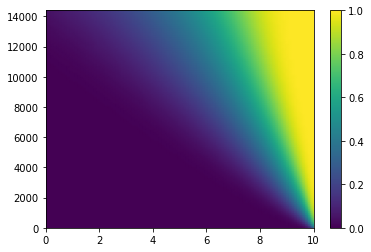

In [21]:
plt.pcolormesh(x, y, sol.x, shading='gouraud')
plt.colorbar()
plt.show()

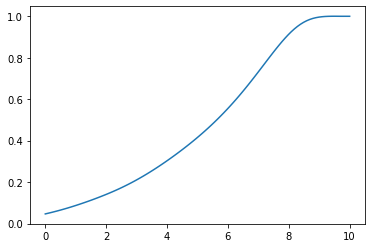

In [22]:
plt.plot(x[:,-1],sol.x[:,-1])

In [23]:
sol.x[:,-1]

array([0.0464661 , 0.04997123, 0.05357878, 0.05734982, 0.06120917,
       0.06524265, 0.0694376 , 0.07375274, 0.07823218, 0.0828408 ,
       0.08758021, 0.09245476, 0.09743596, 0.10253451, 0.10775283,
       0.11309383, 0.11858065, 0.12420406, 0.1299472 , 0.13581226,
       0.14181295, 0.14797832, 0.15433436, 0.16089198, 0.16765855,
       0.17464313, 0.18185271, 0.18929258, 0.19696753, 0.20488033,
       0.21303271, 0.22142481, 0.23005486, 0.23891946, 0.24801381,
       0.25733207, 0.26686778, 0.2766142 , 0.28656489, 0.29671411,
       0.30705747, 0.31759237, 0.32831846, 0.33923797, 0.35035578,
       0.36167935, 0.3732184 , 0.38498453, 0.39699071, 0.40925084,
       0.42177938, 0.43459108, 0.44770082, 0.46112352, 0.47487399,
       0.48896677, 0.50341585, 0.51823425, 0.53343357, 0.54902347,
       0.56501123, 0.58140131, 0.59819491, 0.61538924, 0.63297682,
       0.65094435, 0.66927141, 0.68792913, 0.70687866, 0.72606982,
       0.74543985, 0.76491245, 0.78439703, 0.80378835, 0.82296